## <center> <h1>TP1 INF8225<h1> </center>
<center> <h1>Louis Henri Franc<h1> </center>

# Question 1
L'objectif de la question sera de construire un réseau bayésien, afin d'étudier les différentes interactions d'indépendance conditionnelles entre les variables du réseau. Pour cela, j'ai décidé de travailler sur un simple réseau qui permettra de voir les différents phénomènes d'interactions.

## Description du réseau

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import graphviz as gv
import matplotlib.image as mpimg



Pour créer notre graphe, nous allons utiliser la librairie _pgmpy_, qui est similaire à la librairie _pmtk3_ mais pour Python.

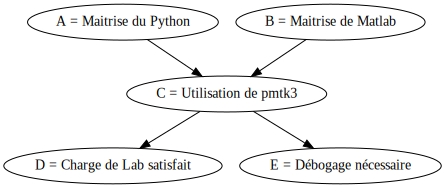

In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import numpy as np
import matplotlib.pyplot as plt
g2 = gv.Digraph()
g2.node('A = Maitrise du Python')
g2.node('B = Maitrise de Matlab')
g2.node('C = Utilisation de pmtk3')
g2.node('D = Charge de Lab satisfait')
g2.node('E = Débogage nécessaire')
g2.edge('A = Maitrise du Python', 'C = Utilisation de pmtk3')
g2.edge('B = Maitrise de Matlab', 'C = Utilisation de pmtk3')
g2.edge('C = Utilisation de pmtk3', 'D = Charge de Lab satisfait')
g2.edge('C = Utilisation de pmtk3', 'E = Débogage nécessaire')
g2

In [3]:
# Creation des différentes variables aléatoires ainsi que du réseau
node0 = "A"
node1 = "B"
node2 = "C"
node3 = "D"
node4 = "E"

# Créer le reseau bayésien
model = BayesianModel([(node0, node2),
                       (node1, node2),
                       (node2, node3),
                       (node2, node4)])

cpd_python = TabularCPD(variable=node0, variable_card=2,
                        values=[[0.3], [0.7]])

cpd_matlab = TabularCPD(variable=node1, variable_card=2,
                        values=[[0.5], [0.5]])

cpd_pmtk3 = TabularCPD(variable=node2, variable_card=2,
                       values=
                       [[0.10, 0.01, 0.75, 0.40],
                        [0.90, 0.99, 0.25, 0.60]],
                       evidence=[node0, node1],
                       evidence_card=[2, 2])

cpd_satisfaction = TabularCPD(variable=node3, variable_card=2,
                              values=[
                                  [0.7, 0.9],
                                  [0.3, 0.1]],
                              evidence=[node2], evidence_card=[2])

cpd_debug = TabularCPD(variable=node4, variable_card=2,
                       values=[
                           [0.2, 0.6],
                           [0.8, 0.4]],
                       evidence=[node2], evidence_card=[2])

model.add_cpds(cpd_python, cpd_matlab, cpd_pmtk3, cpd_satisfaction, cpd_debug)
print("Probability are correctly defined: " + str(model.check_model()))

Probability are correctly defined: True


Voici par exemple la table de probabilité de la variable C:

In [4]:
print(model.get_cpds(node2))
# A_0 veut dire variable A est dans l'état 0, ici Faux

╒═════╤═════╤══════╤══════╤═════╕
│ A   │ A_0 │ A_0  │ A_1  │ A_1 │
├─────┼─────┼──────┼──────┼─────┤
│ B   │ B_0 │ B_1  │ B_0  │ B_1 │
├─────┼─────┼──────┼──────┼─────┤
│ C_0 │ 0.1 │ 0.01 │ 0.75 │ 0.4 │
├─────┼─────┼──────┼──────┼─────┤
│ C_1 │ 0.9 │ 0.99 │ 0.25 │ 0.6 │
╘═════╧═════╧══════╧══════╧═════╛


In [5]:
# Table de probabilité de la variable D
print(model.get_cpds(node3))

╒═════╤═════╤═════╕
│ C   │ C_0 │ C_1 │
├─────┼─────┼─────┤
│ D_0 │ 0.7 │ 0.9 │
├─────┼─────┼─────┤
│ D_1 │ 0.3 │ 0.1 │
╘═════╧═════╧═════╛


In [6]:
# Table de probabilité de la variable B
print(model.get_cpds(node1))



╒═════╤═════╕
│ B_0 │ 0.5 │
├─────┼─────┤
│ B_1 │ 0.5 │
╘═════╧═════╛


## Explaining Away
Le principe est que si deux noeuds (_p1_, _p2_) partagent un même enfant (_e1_), et qu'ils ne sont pas connectés entre eux directement, alors les variables aléatoires correspondant aux noeuds parents sont indépendants: $P(p1, p2) = P(p1)P(p2)$.  
Cependant si _e1_ est observé, alors _p1_ est dépendant de l'état de _p2_ conditionnelement à _e1_.  
Voici le résultat pour la probabilité marginale de _A_ étant donné que _B_ vaut 1 ou 0:

In [7]:
infer = VariableElimination(model)
print(infer.query([node0], evidence={node1: 1}) [node0])
print(infer.query([node0], evidence={node1: 0}) [node0])

╒═════╤══════════╕
│ A   │   phi(A) │
╞═════╪══════════╡
│ A_0 │   0.3000 │
├─────┼──────────┤
│ A_1 │   0.7000 │
╘═════╧══════════╛
╒═════╤══════════╕
│ A   │   phi(A) │
╞═════╪══════════╡
│ A_0 │   0.3000 │
├─────┼──────────┤
│ A_1 │   0.7000 │
╘═════╧══════════╛


Ici peut importe que _B_ vaut 1 ou 0, cela n'influence pas la probabilité marginale de la variable _A_.  
Calculons à présent la même marginale, en posant que la variable _C_ est observé.

In [8]:
print(infer.query([node1], evidence={node0: 1, node2: 0}) [node1])
print(infer.query([node1], evidence={node0: 0, node2: 0}) [node1])

╒═════╤══════════╕
│ B   │   phi(B) │
╞═════╪══════════╡
│ B_0 │   0.6522 │
├─────┼──────────┤
│ B_1 │   0.3478 │
╘═════╧══════════╛
╒═════╤══════════╕
│ B   │   phi(B) │
╞═════╪══════════╡
│ B_0 │   0.9091 │
├─────┼──────────┤
│ B_1 │   0.0909 │
╘═════╧══════════╛


On voit que à présent que la connaissance de l'état de la variable centrale influence les probabilités sur l'état des parents. 

## Serial Blocking
Dans une chaine (de Markov), si l'on observe un noeud intermédaire ($e_t$) entre deux noeuds ($e_{t-1}$, $e_{t+1}$), alors tous les précédents au noeud observé n'ont pas d'influence sur l'état des variables après le noeud observé, c'est à dire $P(e_{t+1} | e_t, e_{t-1}) = P(e_{t+1}|e_t)$.   
Nous allons l'illustrer avec notre modèle:

In [9]:
print(infer.query([node4], evidence={node0: 1}) [node4])
print(infer.query([node4], evidence={node0: 0}) [node4])


╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.3700 │
├─────┼──────────┤
│ E_1 │   0.6300 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.5780 │
├─────┼──────────┤
│ E_1 │   0.4220 │
╘═════╧══════════╛


Lorsque l'on observe la variable A et que l'on calcule la marginale de E, on se rend compte que si l'état de la première varie, alors la marginale de la dernière est influencée.

In [10]:
print(infer.query([node4], evidence={node1: 1, node2: 0}) [node4])
print(infer.query([node4], evidence={node1: 0, node2: 0}) [node4])


╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.2000 │
├─────┼──────────┤
│ E_1 │   0.8000 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.2000 │
├─────┼──────────┤
│ E_1 │   0.8000 │
╘═════╧══════════╛


Maintenant, si l'on a observé la variable entre les deux (variable C), alors connaître l'état de la variable A, ne fait pas varier les probabilités marginales de E.

## Divergent Blocking
Si deux noeuds ont un même parent, ces deux noeuds sont conditionnellement indépendant étant donné l'observation de leur parent, c'est à dire que si j'observe la variable parent, alors connaitre l'état d'une des deux variables enfant, n'apporte aucune information dans le calcul de la marginale de l'autre enfant.

In [11]:
print(infer.query([node4], evidence={node3: 1}) [node4])
print(infer.query([node4], evidence={node3: 0}) [node4])

╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.3264 │
├─────┼──────────┤
│ E_1 │   0.6736 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.4563 │
├─────┼──────────┤
│ E_1 │   0.5437 │
╘═════╧══════════╛


In [12]:
print(infer.query([node4], evidence={node3: 1, node2: 1}) [node4])
print(infer.query([node4], evidence={node3: 0, node2: 1}) [node4])

╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.6000 │
├─────┼──────────┤
│ E_1 │   0.4000 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.6000 │
├─────┼──────────┤
│ E_1 │   0.4000 │
╘═════╧══════════╛


# Exercice 2

## a) Définition du modèle

In [13]:
C, T, A, M, J = "C", "T", "A", "M", "J"
model = BayesianModel([(C, A),
                       (T, A),
                       (A, M),
                       (A, J)])
cpd_C = TabularCPD(variable=C, variable_card=2,
                        values=[[0.999], [0.001]])
cpd_T = TabularCPD(variable=T, variable_card=2,
                        values=[[0.998], [0.002]])
cpd_A = TabularCPD(variable=A, variable_card=2,
                       values=
                       [[0.999, 0.71, 0.06, 0.05],
                        [0.001, 0.29, 0.94, 0.95]],
                       evidence=[C, T],
                       evidence_card=[2, 2])
cpd_M = TabularCPD(variable=M, variable_card=2,
                              values=[
                                  [0.95, 0.1],
                                  [0.05, 0.9]],
                              evidence=[A], evidence_card=[2])
cpd_J = TabularCPD(variable=J, variable_card=2,
                              values=[
                                  [0.99, 0.3],
                                  [0.01, 0.7]],
                              evidence=[A], evidence_card=[2])
model.add_cpds(cpd_C, cpd_T, cpd_A, cpd_M, cpd_J)
print("Are probabilities correctly defined: " + str(model.check_model()))

Are probabilities correctly defined: True


## b) Histogramme de la probabilité jointe

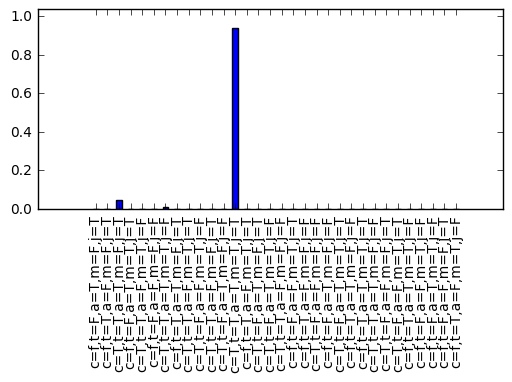

In [14]:
Pc = np.array([[0.001], [0.999]])

Pt = np.array([[0.002], [0.998]])

Pa = np.array([[[0.95, 0.94],
                [0.29, 0.001]], [[0.05, 0.06],
                                 [0.71, 0.999]]])
Pm = np.array([[0.9, 0.05],
               [0.10, 0.95]])
Pj = np.array([[0.70, 0.01],
               [0.30, 0.99]])

# 0 -> true, 1 -> false
def get_joint_distribution(state_C, state_T, state_A, state_M, state_J):
    joint_probability = 1
    joint_probability *= Pc[state_C] * Pt[state_T] * Pm[state_M][state_A] * Pj[state_J][state_A]
    joint_probability *= Pa[state_A][state_C][state_T]
    return joint_probability


def is_lower(character):
    if character[-1] == "T":
        return 1
    return 0


dic = {}
for c in ["c=T", "c=f"]:
    for t in [",t=T", ",t=F"]:
        for a in [",a=T", ",a=F"]:
            for m in [",m=T", ",m=F"]:
                for j in [",j=T", ",j=F"]:
                    dic[c + t + a + m + j] = get_joint_distribution(is_lower(c), is_lower(t), is_lower(a), is_lower(m),
                                                                    is_lower(j))
X = np.arange(len(dic))
plt.bar(X, dic.values(), align='center', width=0.5)
plt.xticks(X, dic.keys())
plt.xticks(rotation=90)
ymax = max(dic.values()) + 0.1
plt.subplots_adjust(bottom=0.40)
plt.ylim(0, ymax)
plt.show()


## c) Calcul de probabilités marginales conditionnelles

In [15]:
infer = VariableElimination(model)
print("Probabilite(Cambriolage = V| MarieAppelle=V, JeanAppelle=F)")
print(infer.query(['C'], evidence={'M': 1, 'J': 0}) ['C'].values[1])

print("Probabilite(Cambriolage = V| MarieAppelle=F, JeanAppelle=V)")
print(infer.query(['C'], evidence={'M': 0, 'J': 1})['C'].values[1])

print("Probabilite(Cambriolage = V| MarieAppelle=V, JeanAppelle=V)")
print(infer.query(['C'], evidence={'M': 1, 'J': 1})['C'].values[1])

print("Probabilite(Cambriolage = V| MarieAppelle=F, JeanAppelle=F)")
print(infer.query(['C'], evidence={'M': 0, 'J': 0})['C'].values[1])

print("Probabilite(Cambriolage = V| MarieAppelle=V)")
print(infer.query(['C'], evidence={'M': 1})['C'].values[1])

print("Probabilite(Cambriolage = V| JeanAppelle=V)")
print(infer.query(['C'], evidence={'J': 1})['C'].values[1])

Probabilite(Cambriolage = V| MarieAppelle=V, JeanAppelle=F)
0.0051298581334
Probabilite(Cambriolage = V| MarieAppelle=F, JeanAppelle=V)
0.00687624607342
Probabilite(Cambriolage = V| MarieAppelle=V, JeanAppelle=V)
0.284171835364
Probabilite(Cambriolage = V| MarieAppelle=F, JeanAppelle=F)
9.01843937548e-05
Probabilite(Cambriolage = V| MarieAppelle=V)
0.0162837299468
Probabilite(Cambriolage = V| JeanAppelle=V)
0.0561174540389


## d) Calcul de probabilités marginales incoditionnelles

In [16]:
print('P(C=True): %f' % infer.query(['C']) ['C'].values[1])
print('P(T=True): %f' % infer.query(['T']) ['T'].values[1])
print('P(A=True): %f' % infer.query(['A']) ['A'].values[1])
print('P(M=True): %f' % infer.query(['M']) ['M'].values[1])
print('P(J=True): %f' % infer.query(['J']) ['J'].values[1])

P(C=True): 0.001000
P(T=True): 0.002000
P(A=True): 0.002516
P(M=True): 0.052139
P(J=True): 0.011736


## e) Equations

### Calcul de $P(C)$
On applique la _Sum rule_
$$P(J) = \sum_{c,t,a,m}P(J, C=c, A=a, T=t, M=m)\text{,  }\forall c,t,a,m \in {v, f}$$
Dans un réseau bayésien, chaque noeud ne dépend que de ces parents: $P(A_1, A_2, ..., A_n) = \prod_{i=1}^n P(A_i|parents(A_i))$.  
On a donc:  
$$P(J) = \sum_{c,t,a,m}(P(J|A=a)P(M=m|A=a)P(A=a|T=t,C=c)P(C=c)P(T=t)$$
On met les sommes le plus à gauche possible.
$$P(J) = \sum_{c}P(C=c)\sum_tP(T=t)\sum_{a}P(A=a|T=t,C=c)P(J|A=a)\sum_mP(M=m|A=a)$$
### Calcul de $P(C|J=V)$
$$P(C|J=v) = \frac{P(C, J=v)}{P(J=v)}$$
$$P(C|J=v) = \frac{\sum_{t,a,m}P(C, J=v,T=t,A=a,M=m)}{P(J=v)}$$
$$P(C|J=v) = \frac{\sum_{t,a,m}P(C)P(T=t)P(A=a|C,T=t)P(M=m|A=a)P(J=v|A=a)}{P(J=v)}$$
$$P(C|J=v) = \frac{P(C)\sum_{t}P(T=t)\sum_aP(A=a|C,T=t)P(J=v|A=a)\sum_mP(M=m|A=a)}{P(J=v)}$$


# Exercice 3
Implementation de l'algorithme de Sum-Product

In [17]:
import numpy as np
from six import iteritems
from functools import reduce

epsilon = 1e-4


class Graph():
    def __init__(self):
        self.vars = []
        self.factors = []
        self.converged = False

    def add_VarNode(self, name, dim):
        new_id = len(self.vars)
        new_var = VariableNode(name, dim, new_id)
        self.vars.append(new_var)
        return new_var

    def add_FactorNode(self, mat, *args):
        new_id = len(self.factors)
        new_fac = FactorNode(mat, new_id, *args)
        self.factors.append(new_fac)

    def do_sumProduct(self):
        while not self.converged:
            for f in self.factors:
                f.create_new_messages()
                f.send_messages()

            for v in self.vars:
                v.create_new_messages()
                v.send_messages()

            converged = True
            for v in self.vars:
                converged = converged and v.has_converged()
            for f in self.factors:
                converged = converged and f.has_converged()
            if converged:
                self.converged = True

    def get_marginalized(self, name):
        for var in self.vars:
            if var.name == name:
                message = 1
                for incoming_message in var.incomings:
                    message *= incoming_message
                message /= np.sum(message)
                return message
        print("Variable %s does not exist" % name)
        return None


class Node():
    def __init__(self, new_id):
        self.id = new_id
        self.incomings = []
        self.outgoings = []
        self.old_outgoings = []
        self.neighbors = []

    def has_converged(self):
        for i in range(0, len(self.outgoings)):
            if (np.absolute(self.outgoings[i].squeeze() - self.old_outgoings[i].squeeze()) > epsilon).any():
                return False
        return True

    def send_messages(self):
        for i in range(0, len(self.outgoings)):
            self.neighbors[i].receive_message(self, self.outgoings[i])

    def receive_message(self, f, m):
        i = self.neighbors.index(f)
        self.incomings[i] = m

    def normalized(self):
        self.outgoings = [outgoing / np.sum(outgoing) for outgoing in self.outgoings]

    def next_step(self):
        self.old_outgoings = self.outgoings[:]


class FactorNode(Node):
    def __init__(self, mat, new_id, *args):
        super().__init__(new_id)
        self.mat = mat
        self.neighbors = list(args)
        nb_neighbors = len(self.neighbors)
        for i in range(0, nb_neighbors):
            neighbour = self.neighbors[i]
            dim = neighbour.dim
            neighbour.neighbors.append(self)
            neighbour.incomings.append(np.ones((dim, 1)))
            neighbour.outgoings.append(np.ones((dim, 1)))
            neighbour.old_outgoings.append(np.ones((dim, 1)))
            self.incomings.append(np.ones((dim, 1)))
            self.outgoings.append(np.ones((dim, 1)))
            self.old_outgoings.append(np.ones((dim, 1)))

    def create_new_messages(self):
        self.next_step()
        mnum = len(self.incomings)
        for i in range(0, mnum):
            next_shape = list(self.mat.shape)
            prep_shape = [1 for x in next_shape]
            prep_shape[0] = self.incomings[i].shape[0]
            self.incomings[i].shape = prep_shape
            del next_shape[i]
            next_shape.insert(0, 1)
            self.incomings[i] = np.tile(self.incomings[i], next_shape)
            self.incomings[i] = np.rollaxis(self.incomings[i], 0, i + 1)
        for i in range(0, mnum):
            curr = self.incomings[:]
            del curr[i]
            new_message = reduce(np.multiply, curr, self.mat)
            new_message = np.rollaxis(new_message, i, 0)
            new_message = np.sum(new_message, tuple(range(1, mnum)))
            new_message.shape = (new_message.shape[0], 1)
            self.outgoings[i] = new_message
        self.normalized()


class VariableNode(Node):
    def __init__(self, name, dim, new_id):
        super().__init__(new_id)
        self.name = name
        self.dim = dim

    def create_new_messages(self):
        self.next_step()
        if len(self.neighbors) > 1:
            for i in range(len(self.incomings)):
                all_incomings = self.incomings[:]
                del all_incomings[i]
                new_message_values = all_incomings[0]
                for j in range(1, len(all_incomings)):
                    new_message_values = np.multiply(new_message_values, all_incomings[j])
                self.outgoings[i] = new_message_values
            self.normalized()


def test():
    G = Graph()
    # Add nodes
    a = G.add_VarNode('C', 2)
    b = G.add_VarNode('T', 2)
    c = G.add_VarNode('A', 2)
    d = G.add_VarNode('M', 2)
    e = G.add_VarNode('J', 2)

    # Add factors
    Pa = np.array([[0.001], [0.999]])
    G.add_FactorNode(Pa, a)

    Pb = np.array([[0.002], [0.998]])
    G.add_FactorNode(Pb, b)

    Pc = np.array([[[0.95, 0.94],
                    [0.29, 0.001]], [[0.05, 0.06],
                                     [0.71, 0.999]]])
    G.add_FactorNode(Pc, c, a, b)

    Pd = np.array([[0.9, 0.05], [0.10, 0.95]])
    G.add_FactorNode(Pd, d, c)

    Pe = np.array([[0.70, 0.01], [0.30, 0.99]])
    G.add_FactorNode(Pe, e, c)
    # Compute the algorithm
    G.do_sumProduct()
    # Print values
    print('Marginale de T: ', G.get_marginalized('T').squeeze())
    print('Marginale de C: ', G.get_marginalized('C').squeeze())
    print('Marginale de A: ', G.get_marginalized('A').squeeze())
    print('Marginale de M: ', G.get_marginalized('M').squeeze())
    print('Marginale de J: ', G.get_marginalized('J').squeeze())


test()


Marginale de T:  [ 0.002  0.998]
Marginale de C:  [ 0.001  0.999]
Marginale de A:  [ 0.00251644  0.99748356]
Marginale de M:  [ 0.05213898  0.94786102]
Marginale de J:  [ 0.01173634  0.98826366]


On retrouve les mêmes quantités que celle calculées avec la la librairie Python.